<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Unsupervised Analysis Project</h2>
<h4>DAT-5329 | Introduction to Machine Learning & AI </h4>
Facebook Live Data<br>
Michelle Kae Celine Jo-anne Bantugon<br>
Hult International Business School<br>
April 12, 2024 <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3> Introduction </h3>

As digitalization and the use of social media continue to increase, platforms like Facebook have become vital for small vendors to expand their reach and engage with a larger audience especially in Thailand. This transformation has significantly influenced marketing strategies, particularly in how individuals interact with Facebook content. Engagement refers to various actions users take on posts, pages, groups, or ads, including comments, shares, likes, and reactions like love, wow, haha, angry, and sad. This analysis focuses on studying the impact of photo content on Facebook engagement in Thailand. It employs various machine learning techniques such as Logistic Regression, Principal Component Analysis (PCA), and k-means clustering to analyze the variability of consumer engagement. By understanding the effectiveness of different types of content based on engagement metrics, this analysis aims to provide valuable insights to marketing firms and social media consultants. These insights can help optimize content creation strategies and increase engagement on Facebook in Thailand's dynamic social media environment.

<h3> Conclusion </h3><br>
The analysis showed valuable insights into the impact of different types of content, particularly photos, on Facebook engagement in Thailand. Across various clusters, photos come out as a popular and effective means of communication, prompting positive reactions such as likes and wows as engagement. Moreover, the study also highlights the importance of diversifying content strategies to cater to different audience preferences. While some clusters demonstrate a strong preference for photo posts, others show greater engagement with video or text content.

<h3> Recommendation </h3>

<b>1. Content and Relationship Strategy</b><br>
- Photo Emphasis<br>
With the popularity of photos, company should focus on creating visually appealing and engaging photo content. Use high-quality images that are likely to stimulate positive emotions and encourage likes. 
- Diversification <br>
While photos are popular, consider diversifying content with videos and text posts to cater to different audience preferences. Cluster 3, for example, shows a strong interest in videos, suggesting an opportunity to explore video content creation.
- Emotional Appeal <br>
Ensure that the content create positive emotions such as happiness, excitement, or inspiration, as these are more likely to result in likes and positive engagement. This is aligned with the findings by Lee et al. (2016) who found out that enjoyment of content and interpersonal relationships were the two most common motives for liking.

<b>2. Engagement Strategies</b><br>

- Interactive Content<br>
Create engaging and interactive content that encourages comments, shares, and other forms of reactions. The use of unusual, participatory activities such as contests, games, and artistic performances will drive reactions and comments (Apiradee Wongkitrungrueng, Nassim Dehouche & Nuttapol Assarut, 2020).
- Storytelling<br>
Use storytelling techniques to make your content more relatable and engaging. People tend to engage more with content that resonates with them on a personal level.

<b>2. Track Performance</b><br>
- Monitor and evaluate photo content performance metrics and other status types on a regular basis to find out what appeals to the audience. Utilize analytical tools to monitor engagement metrics such as likes, shares, comments, and others.


<h4>Part I: Preparation and Exploration</h4>
<h4>a) Package and Dataset Imports</h4>

In [1]:
########################################
# importing packages
########################################
import numpy                 as np                          # mathematical essentials
import pandas                as pd                          # data science essentials
import matplotlib.pyplot     as plt                         # fundamental data visualization
import seaborn               as sns                         # enhanced visualizations

# data preprocessing and modeling
from sklearn.preprocessing import power_transform           # for skewness 
import statsmodels.formula.api as smf                       # logistic regression
from sklearn.model_selection import train_test_split        # train/test split
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
from sklearn.cluster import KMeans                          # k-means clustering
import sklearn.linear_model                                 # classification modeling
from sklearn.metrics import precision_score, recall_score



# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler          # standard scaler
from sklearn.decomposition   import PCA                     # pca
from scipy.cluster.hierarchy import dendrogram, linkage     # dendrograms
from sklearn.cluster         import KMeans                  # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
facebook_df = pd.read_excel(io = './facebook_live_data.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# checking results
facebook_df.head(n = 5)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0


<h4> User-defined functions </h4>

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, retain_components = None, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    # adding a vertical red line for the specified number of components to retain
    if retain_components is not None:
        plt.axvline(x = retain_components, color ='red', linestyle = 'dashed', label = f'Retain up to PC {retain_components}')

    plt.legend()

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [3]:
# INFOrmation about each variable
facebook_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB


In [4]:
# Checking missing values 
facebook_df.isnull().sum(axis=0)

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

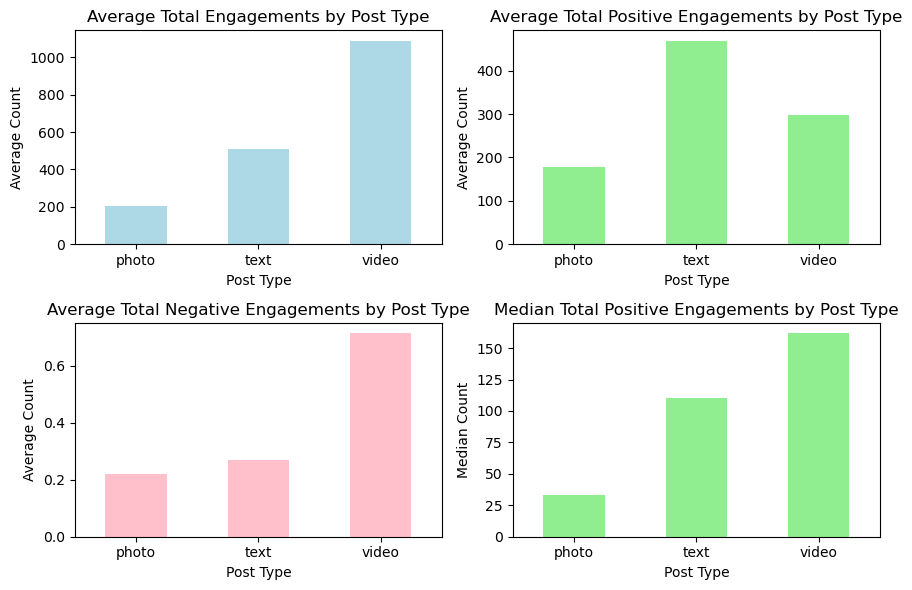

In [5]:
# Adding the new engagement metrics

# Total engagement
facebook_df['total_engagements'] = facebook_df['num_comments'] + facebook_df['num_shares'] +\
                                   facebook_df['num_likes'] + facebook_df['num_loves'] + \
                                   facebook_df['num_wows'] + facebook_df['num_hahas'] + \
                                   facebook_df['num_sads'] + facebook_df['num_angrys']
# Positive engagement
facebook_df['total_positive_engagements'] = facebook_df['num_likes'] + facebook_df['num_loves'] +\
                                            facebook_df['num_wows'] + facebook_df['num_hahas']
# Negative engagement
facebook_df['total_negative_engagements'] = facebook_df['num_sads'] + facebook_df['num_angrys']

# Calculating the mean per status type for total engagements, positive engagements, and negative engagements
avg_engagement_total = facebook_df.groupby('status_type')['total_engagements'].mean()
avg_engagement_positive_mean = facebook_df.groupby('status_type')['total_positive_engagements'].mean()
avg_engagement_negative = facebook_df.groupby('status_type')['total_negative_engagements'].mean()

# Calculate median per status_type for positive engagements since mean > median (positively skewed)
median_positive_engagements = facebook_df.groupby('status_type')['total_positive_engagements'].median()

# Plot the bar charts
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Total Engagements (Mean)
avg_engagement_total.plot(kind='bar', ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Average Total Engagements by Post Type')
axes[0, 0].set_ylabel('Average Count')
axes[0, 0].set_xlabel('Post Type')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Total Positive Engagements (Mean)
avg_engagement_positive_mean.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Total Positive Engagements by Post Type')
axes[0, 1].set_ylabel('Average Count')
axes[0, 1].set_xlabel('Post Type')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Total Negative Engagements (Mean)
avg_engagement_negative.plot(kind='bar', ax=axes[1, 0], color='pink')
axes[1, 0].set_title('Average Total Negative Engagements by Post Type')
axes[1, 0].set_ylabel('Average Count')
axes[1, 0].set_xlabel('Post Type')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Total Positive Engagements (Median)
median_positive_engagements.plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Median Total Positive Engagements by Post Type')
axes[1, 1].set_ylabel('Median Count')
axes[1, 1].set_xlabel('Post Type')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

<h4>Analysis of Engagement Metrics by Post Type</h4>

The analysis of engagement metrics by post type shows that photo posts exhibit the least average engagement compared to video and text posts. Photos receive the lowest average engagement in terms of total engagements and total positive engagements, including likes, love, wow, and haha reactions. They also attract the least amount of engagement on specific reactions.

<b>Total Engagement</b><br>
The data indicates that video posts receive the highest average engagement compared to photo and text posts. This metric considers all reactions, including likes, comments, shares, as well as the love, haha, wow, sad, and angry reactions.

<b>Total Positive Engagement</b><br>
Video posts also exhibit the highest median count of positive engagements, including likes, love, wow, and haha reactions, compared to photo and text posts. Although text posts have a higher average count, the skewed distribution indicates that video posts generally perform better in this regard.

<b>Total Negative Engagement</b><br>
Despite video posts showing a higher average of negative engagements, the overall counts for all post types remain relatively low compared to positive engagements.

Video posts for live selling in Thailand appear to garner the most engagement, both in total and in terms of positive reactions. While they also attract more negative engagement on average, the overall negative engagement across all post types is low in comparison to positive engagement. This suggests that video content is particularly effective in engaging audiences in a positive manner, making it a valuable strategy for content creators, business owners, and marketers in Thailand.

Further analysis could focus on understanding why videos perform better and explore ways to optimize photo content to increase engagement. This could include creating more compelling and engaging visual content with different types of images, subject, captions, and posting strategies to see what resonates most with the audience.

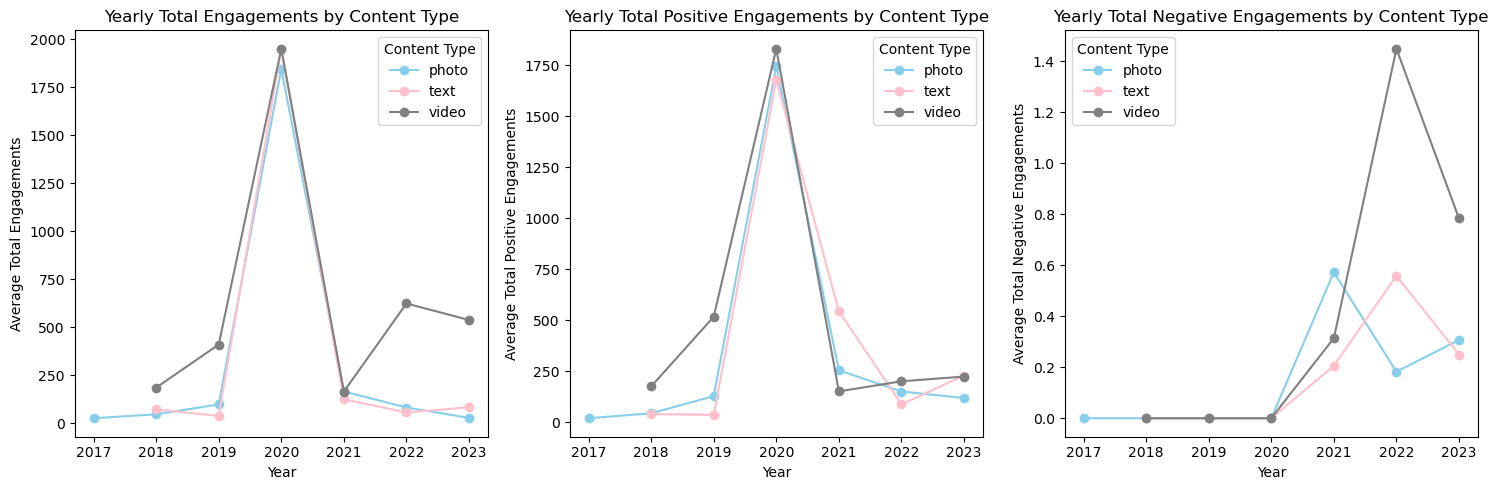

In [6]:
# Extracting the year from time_published column
facebook_df['year'] = facebook_df['time_published'].dt.year

# Select the relevant columns for plotting
total_engagements = facebook_df[['year', 'status_type', 'total_engagements']]
total_positive_engagements = facebook_df[['year', 'status_type', 'total_positive_engagements']]
total_negative_engagements = facebook_df[['year', 'status_type', 'total_negative_engagements']]

# Group the data by year and status type, and calculate the mean of each engagement metric
total_engagements_yearly = total_engagements.groupby(['year', 'status_type']).median().reset_index()
total_positive_engagements_yearly = total_positive_engagements.groupby(['year', 'status_type']).mean().reset_index()
total_negative_engagements_yearly = total_negative_engagements.groupby(['year', 'status_type']).mean().reset_index()

# Plot the line charts for each engagement type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, dataset, title in zip(axes,
                              [total_engagements_yearly, total_positive_engagements_yearly, total_negative_engagements_yearly],
                              ['Total Engagements', 'Total Positive Engagements', 'Total Negative Engagements']):
    for status_type in dataset['status_type'].unique():
        subset = dataset[dataset['status_type'] == status_type]
        color = 'skyblue' if status_type == 'photo' else 'grey' if status_type == 'video' else 'pink'
        ax.plot(subset['year'], subset[title.lower().replace(' ', '_')], label=status_type, marker='o', color=color)
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Average {title}')
    ax.set_title(f'Yearly {title} by Content Type')
    ax.legend(title='Content Type')
    ax.grid(False)

plt.tight_layout()
plt.show()

The analysis of Facebook Live data in Thailand reveals interesting trends in engagement over the years. In 2020, there was a substantial 95% increase in total engagement across all content types compared to previous years. However, this surge was followed by a notable decline in engagement across all content types in subsequent years, except for videos, which experienced a resurgence in the following year.

<b>Peak Engagement Years</b><br>
The years 2020 and 2022 stood out as peak engagement years, particularly for video content. This suggests that there may have been specific events, campaigns, or content strategies during these periods that resonated particularly well with the audience.

<b>Positive Engagement Dominance</b><br>
Positive engagements, such as likes, loves, wows, and hahas, dominated overall interactions across all content types in year 2020. 

<b>Negative Engagement Patterns</b><br>
While negative engagements, including angry and sad reactions, were relatively lower in count compared to positive engagements, there were noticeable increases in certain years and content types. 

<b>Insights for Deeper Analysis</b>
- Explore why video content maintained high engagement levels, especially in 2020 and 2022. Is there a particular type of video or content strategy that resonates well with the audience?<br>
- Investigate the reasons behind the decrease in total engagements for all content types after 2020. Was there a change in audience behavior or content quality?<br>
- Look into the factors contributing to the increase in negative engagements on photo in 2021 and text in 2022. Are there specific topics or issues that trigger negative reactions from the audience?

In [7]:
# Grouping the data by 'status_type' and calculate the sum of reactions for each group
total_reactions_by_type = facebook_df.groupby('status_type')[ ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ].sum()

# Adding a column for the total reactions
total_reactions_by_type['total_reactions'] = total_reactions_by_type.sum(axis=1)

# Sorting the table by the highest total reactions
total_reactions_by_type = total_reactions_by_type.sort_values(by='total_reactions', ascending = False)

# Display the results
total_reactions_by_type

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_reactions
status_type,,,,,,,,,
video,514376,89158,196253,28100,1912,1560,336,210,831905
photo,31796,4385,253180,2009,983,168,239,78,292838
text,5898,517,72918,189,134,20,40,2,79718


<h4> Analysis of Content Type by reactions</h4>

<b>Total Engagement</b> <br>
Based on the table below, <b>videos perform exceptionally well in terms of total engagement</b> compared to other forms of content, such as photos and text posts. Videos have the highest total engagement with a total of 831,905 reactions. Photos follow behind with a total of 292,838 reactions, while text posts have the lowest total engagement with 79,718 reactions.

<b>Engagement in Specific Reactions</b><br>
When looking at specific reactions, videos also tend to lead in almost all of the categories indicating higher levels of interaction and engagement among users except likes. However, <b> photos have the highest number of likes</b> compared to other forms of content, with 253,180 likes possibly indicating that they may perform better in terms of likeability. On the other hand, text posts have the lowest engagement across all specific reactions.<br>

This initial analysis suggests that incorporating more visual content, particularly photos and videos, could lead to higher engagement and interaction with the audience.

In [8]:
# Performing one-hot encoding for status_type
status_type_encoded = pd.get_dummies(facebook_df['status_type']).astype(int)

# Concatenating the encoded columns with the original dataframe
facebook_df_encoded = pd.concat([facebook_df, status_type_encoded], axis = 1)

# Assigning the encoded dataframe to the original variable name
facebook_df = facebook_df_encoded.drop(['text', 'video'],
                                         axis = 1)

# Display the first two rows
facebook_df.head(n=2)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_engagements,total_positive_engagements,total_negative_engagements,year,photo
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0,150,150,0,2023,1
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0,215,210,0,2023,1


In [9]:
# removing non-continuous column
reaction_df = facebook_df.drop(['status_id', 'status_type' ,
                                'time_published', 
                                'total_engagements',
                                'total_positive_engagements', 
                                'total_negative_engagements',
                                'year',
                                'photo'], 
                                 axis = 1)

# scaling (normalizing) variables before correlation analysis
reaction_scaled = scaler(df = reaction_df)


# checking pre- and post-scaling variance
print(np.var(reaction_df), '\n\n')
print(np.var(reaction_scaled))

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


C:\Users\joann\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [10]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 702)

# FITTING and TRANSFORMING the scaled data
reaction_pca = pca.fit_transform(reaction_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", reaction_scaled.shape)
print("PCA shape     :", reaction_pca.shape)

Original shape: (2362, 8)
PCA shape     : (2362, 8)


In [11]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(decimals = 3)}")

PC 1: 0.409
PC 2: 0.128
PC 3: 0.115
PC 4: 0.11
PC 5: 0.1
PC 6: 0.077
PC 7: 0.045
PC 8: 0.017


<b> Choosing Principal Components </b><br>
When analyzing Facebook Live data in Thailand, it's crucial to determine the optimal number of principal components to retain for meaningful insights. One method is to set a threshold of explained variance, typically around 80%, and choose the number of components that achieve a cumulative variance close to this threshold (Towards Data Science, 2022).

The scree plot below illustrates the cumulative explained variance against the number of principal components. Despite an initial inclination to select 2 principal components due to an apparent elbow in the plot, it's essential to note that the cumulative variance ratio of these 2 components falls below 80%. After the fifth principal component, the amount of variance explained by each subsequent component diminishes significantly, as shown by the flattening of the curve. Consequently, retaining <b>5 principal components</b> seems more appropriate, as it yields a cumulative explained variance ratio of 0.862.

Furthermore, the previous visualizations highlighted peak engagement in specific years for all post types, incorporating various reactions (comments, shares, likes, loves, wows, hahas, sads, and angrys). By considering these factors, we can provide more granular insights into which reactions are most effective for each post type and suggest improvements. This analysis can help content creators and sellers tailor their content to maximize engagement based on the impact of each reaction.

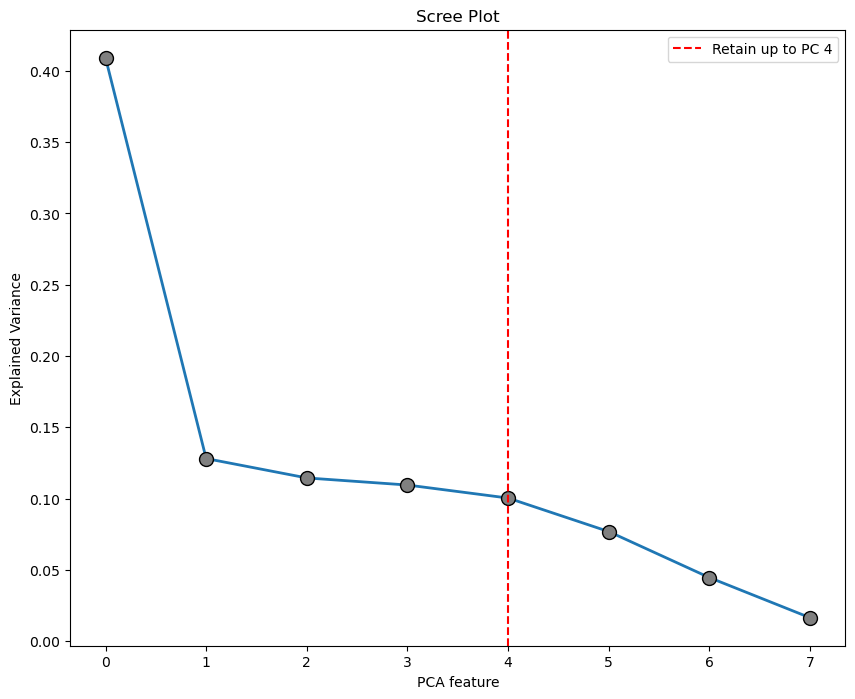

In [12]:
# calling the scree_plot function
scree_plot(pca_object = pca, retain_components = 4)

<h4> Using 5 Principal Components </h4>

In [13]:
# INSTANTIATING a new model using the first five principal components
pca_5 = PCA(n_components = 5,
            random_state = 702)

# FITTING and TRANSFORMING the reaction_scaled
reaction_pca_5 = pca_5.fit_transform(X = reaction_scaled)

<h4> Factor Loadings </h4>

In [14]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(reaction_scaled.columns)


##################
### 5 PC Model ###
##################
# transposing pca components (pc = 5)
factor_loadings_5 = pd.DataFrame(np.transpose(pca_5.components_))


# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(reaction_scaled.columns)

# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(decimals = 2)}


5 Components Factor Loadings
------------------------------
{factor_loadings_5.round(decimals = 2)}
""")

# saving to Excel
factor_loadings_5.to_excel(excel_writer = 'reaction_factor_loadings_5.xlsx',
                            index        = False)


MAX Components Factor Loadings
------------------------------
                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


5 Components Factor Loadings
------------------------------
                 0     1     2     3     4
num_comments  0.41 -0.31 -0.03 -0.20 -0.39
num_shares    0.49 -0.12  0.05 -0.17 -0.21
num_likes     0.16  0.73 -0.35  0.25 -0.49
num_loves     0.50  0.00  0.06 -0.08  0.01
num_wows      0.30  0.48  0.08 -0.08  0.64
num_hahas     0.37  0.01 -0.05 -0.20  0.28
num_sads      0.20 -0.35 

<h4> Factor Loadings Interpretation </h4><br>
<b>Principal Component 1: Interactive & Entertaining</b><br>
Positive side:<br>
With strong positive loadings from loves, shares, and hahas, this component likely reflects the interactive, fun, and engaging nature of the content. It measures the overall interaction a post receives. The high loading in the love reaction suggests a strong emotional connection with the audience and a customer-seller relationship was already established, as noted in research by A. Wongkitrungrueng et al. (2019). This indicates stronger feelings and bonding between sellers and viewers, confirming the importance of vividness and interactivity in generating online engagement on Facebook (Luarn et al., 2015). Using the love reaction also signifies that the audience genuinely care about the content and want to show support (Medium, 2023). 

The high number of shares signifies a collaborative relationship between customers and sellers, with customers encouraged to invite others via the share button, thus building larger audiences. Additionally, high loadings in comments suggest real-time social interaction, enabling sellers to engage with multiple customers simultaneously through written communication. This component highlights that emoticon reactions and comments serve as feedback about products, streaming time, or audio/video quality. This is intriguing as cooperation can exist prior to the purchase and loyalty stages (A. Wongkitrungrueng et al., 2019). Using haha reaction as well means to express amusement, humor, or laughter when you found content funny which creates positive atmosphere.

Negative side:<br>
On the negative side, lower engagement metrics like loves, shares, and hahas indicate content that is ineffective. This suggests a lack of customer-seller relationship or a purely transactional approach, rather than a content-based or relationship-focused strategy. Transaction-based approaches typically focus solely on product details, with minimal discussion on broader topics such as brand values or customer experiences (A. Wongkitrungrueng et al., 2019).

<b> Principal Component 2: Interesting </b><br>
Positive side: <br>
This component exhibits high loadings on likes and moderate loadings on wow reactions. It seems to represent content that is interesting and appealing, but with only one-way interaction. A high loading on likes, which are typically the initial reaction or go-to reaction before emoticon reactions, indicates that customers find value in high-quality content that resonates with them. After the introduction of other reactions, sometimes they may express their interest through a wow reaction. Using wow reaction also shows that you are acknowledging the impact of the post and expressing your admiration. Today, like can signify various things depending on the context. It can indicate agreement, support, appreciation, or simply acknowledging that you have seen the post. It is a versatile tool that allows users to engage with content in a quick and straightforward manner (Medium, 2023). They are also the default way to follow businesses and brands on Facebook. This can make the post appear more popular, potentially encouraging others to click on it.

Negative side: <br>
While likes can lead to further engagement such as comments, this is not guaranteed, and sometimes clicking like may seem inappropriate depending on the post content. On the negative side, this indicates that the content may not be highly effective, possibly due to low-quality material that fails to resonate with the audience. It suggests that the seller may be inactive or not engaging with customers, or that the content is inconsistent, bland, repetitive, and lacks relevance.

<b> Principal Component 3: Emotional </b><br>
Positive side: <br>
A strong positive correlation with sad reactions, followed by angry reactions, suggests a potentially negative response to the content or the seller. It is a way to offer virtual comfort and let them know that you are there for them (Medium, 2023). Posts that share heartwarming stories or evoke strong emotions are likely to receive high scores on this component. For example, content that seeks empathy by recounting unfortunate experiences could fall into this category. Additionally, poor internet connection or low audio/video quality could also contribute to these reactions. Negative feedback, such as sadness or anger, may stem from unsatisfactory service or values that conflict with the audience's beliefs. In Thailand, it is common for sellers with disabilities, sellers who appear impoverished, or sellers with disabled children to receive sad reactions, indicating sympathy from the audience. Other factors, such as gender, age, social status, location, mobility, or the timing of the interaction, can also influence the dynamics of customer-seller interactions. Interestingly, younger social media users, tend to click on the sad reaction in a sarcastic way or if they want to troll the business.

Negative side: <br>
Individuals who refrain from clicking the sad reaction on Facebook indicate a preference against seeing sad content in their feed, given how the Facebook newsfeed algorithm functions. This suggests that the algorithm prioritizes content based on user preferences. In situations where more serious concerns are involved, such as those requiring care, opting for reactions other than sad may be more appropriate (Nick Leighton). Additionally, some users may simply prefer to remain neutral or indifferent.



<b> Principal Component 4: Negative </b><br>
Positive side: <br>
With a significant emphasis on the angry reaction, it signifies disapproval in reaction to a post or comment that might be contentious or offensive. This reaction is commonly used when individuals wish to express strong disagreement or dissatisfaction. Users typically employ it to respond to negative feedback and controversial posts. Utilizing the angry reaction suggests that the content has elicited a strong negative response from the audience. Similarly, if someone has shared a contentious opinion or promoted hatred, the audience can convey their displeasure through the angry reaction.

Negative side: <br>
On the other side, individuals who refrain from using the angry reaction feature perceive it as impolite or trivial when directed at others. They reserve this reaction for instances where the content is highly objectionable or directly challenges their values. Their primary focus is to maintain peaceful interactions and positive relationships with others by avoid debating with people who might disagree or to avoid offending people who hold different views (Warfare Plugins, n.d). This decision is largely influenced by their personal tolerance levels, comfort, and the dynamics of their relationships.


<b> Principal Component 5: Surprising </b><br>
Positive side: <br>
Given its strong association with wows, this aspect of the analysis likely reflects content that is particularly surprising or unexpected. When users choose the wow reaction, they are indicating that the content has captured their attention and left them impressed or amazed. This reaction signifies their acknowledgment of the post's impact and their expression of admiration. However, it's important to note that this reaction could also suggest that the content has shocked or surprised the audience, unless it's being used sarcastically. In such cases, it can still be seen as a positive endorsement (Digital Communications, 2016). 

Negative side: <br>
Choosing not to react with surprise or use the wow reaction suggests that the content lacks a strong impact to create surprise or shock among the audience. The content may be perceived and interpreted differently than intended, potentially leading to unmet expectations and being seen as ordinary, blending in with other ordinary content.


In [15]:
# naming each principal component
factor_loadings_5.columns = ['Interactive & Entertaining', # Engaging & Entertaining (+ Side), Transactional (- side)
                             'Interesting',                # Appealing  (+ Side) , Low quality (- side)
                             'Emotional',                  # Empathy (+ side), Indifferent (- side) 
                             'Negative',                   # Offensive/Disagreement (+ side), Trivial (- side)
                             'Surprising']                 # Unexpected (+ side),  Normal/Plain (- side)

# checking the result
factor_loadings_5.round(decimals = 2).head(n=5)

,Interactive & Entertaining,Interesting,Emotional,Negative,Surprising
num_comments,0.41,-0.31,-0.03,-0.20,-0.39
num_shares,0.49,-0.12,0.05,-0.17,-0.21
num_likes,0.16,0.73,-0.35,0.25,-0.49
num_loves,0.50,0.00,0.06,-0.08,0.01
num_wows,0.30,0.48,0.08,-0.08,0.64


In [16]:
# analyzing factor strengths per status type
factor_loadings = pca_5.transform(reaction_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_5.columns


# checking the results
factor_loadings_df.round(decimals = 2).head(n = 5)

,Interactive & Entertaining,Interesting,Emotional,Negative,Surprising
0,-0.62,-0.01,0.03,-0.03,0.07
1,-0.47,0.13,0.01,-0.03,0.08
2,-0.47,0.13,0.02,-0.03,0.09
3,0.37,0.24,-0.09,-0.31,0.23
4,-0.02,-0.28,-0.28,0.11,0.15


<h4> KMeans Clustering </h4>

In [17]:
# checking variance amongst clusters
np.var(factor_loadings_df)

C:\Users\joann\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Interactive & Entertaining    3.273609
Interesting                   1.025052
Emotional                     0.916344
Negative                      0.876567
Surprising                    0.803501
dtype: float64

In [18]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_rescaled))

Interactive & Entertaining    3.273609
Interesting                   1.025052
Emotional                     0.916344
Negative                      0.876567
Surprising                    0.803501
dtype: float64 


Interactive & Entertaining    1.0
Interesting                   1.0
Emotional                     1.0
Negative                      1.0
Surprising                    1.0
dtype: float64


C:\Users\joann\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<h4> Agglomerative Clustering </h4><br>
Note: Put as a comment as it runs more than 60 seconds

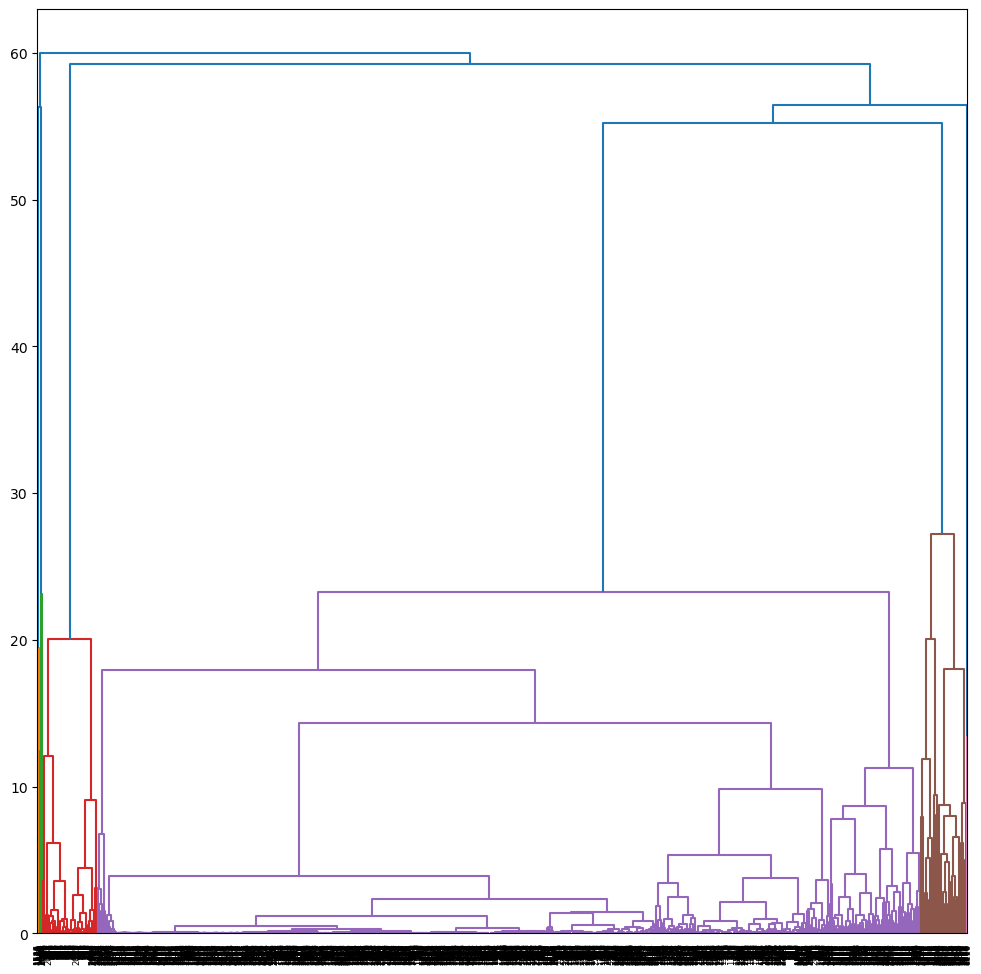

In [19]:
# # grouping data based on Ward distance
# standard_mergings_ward = linkage(y      = pca_rescaled,
#                                  method = 'ward',
#                                  metric = 'euclidean',
#                                  optimal_ordering = True)


# # setting plot size
# fig, ax = plt.subplots(figsize=(12, 12))

# # developing a dendrogram
# dendrogram(Z = standard_mergings_ward,
#            leaf_rotation  = 90       ,
#            leaf_font_size = 6        )

# # rendering the plot
# plt.show()

In this analysis, the combination of Ward linkage and Euclidean distance is ideal for creating clusters. This is because the Ward method minimizes errors when linking points, and Euclidean distance is effective in lower-dimensional spaces, which is the case here with 2362 observations and five features post-rescaling and PCA.

The Ward method is adept at merging smaller clusters without significantly increasing in-cluster variance, making it suitable for the analysis. Utilizing Euclidean distance as the distance metric for clustering allows to quantify the dissimilarity between data points, thereby influencing the hierarchical structure of clusters(IBM, 2024).

In the dendrogram visualization, the optimal number of clusters can be identified by placing a horizontal line within the blue clusters without intersecting any horizontal lines representing clusters. By locating the maximum distance and counting the number of times the horizontal line crosses vertical lines, we can determine the most suitable number of clusters. In this analysis, the horizontal line intersects vertical lines five times, indicating that <b>five clusters</b> may best represent distinct groups within the data.

In [20]:
# INSTANTIATING a k-Means object with clusters
reaction_k_pca = KMeans(n_clusters    = 5  ,
                         n_init       = 'auto',
                         random_state = 702   )

# fitting the object to the data
reaction_k_pca.fit(pca_rescaled)

# converting the clusters to a DataFrame
reaction_kmeans_pca = pd.DataFrame({'Cluster': reaction_k_pca.labels_})

# checking the results
print(reaction_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2092
0     139
3     126
4       3
2       2
Name: count, dtype: int64


In [21]:
# storing cluster centers
centroids_pca = reaction_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)

# renaming principal components
centroids_pca_df.columns = ['Interactive & Entertaining', # Engaging & Entertaining (+ Side), Transactional (- side)  
                             'Interesting',               # Appealing  (+ Side) , Low quality (- side)
                             'Emotional',                 # Empathy (+ side), Indifferent (- side) 
                             'Negative',                  # Offensive/Disagreement (+ side), Trivial (- side)
                             'Surprising'                 # Unexpected (+ side),  Normal/Plain (- side)
                           ]

# checking results (clusters = rows, pc = columns)
centroids_pca_df

,Interactive & Entertaining,Interesting,Emotional,Negative,Surprising
0,0.07,2.60,-1.22,0.83,-1.73
1,-0.21,-0.11,0.07,-0.06,0.17
2,3.26,-0.99,18.06,21.39,-0.73
3,3.27,-0.78,0.22,-0.62,-1.02
4,4.68,-7.00,-15.87,13.33,7.27


<b>Cluster Analysis</b>

<b>1. Cluster 0 - Thought Provoking </b>

In this cluster, posts focus primarily on being intriguing with a hint of negativity, yet they tend to lack significant engagement and interaction. However, they are not notably emotional or surprising. A typical post within this cluster might involve introducing a new product or highlighting improvements in its quality. While the post may pique interest with its intriguing description, it could also elicit some negative reactions if the product doesn't resonate well with the audience.  


<b>2. Cluster 1 - Agreeable </b>

This segment reflects posts that lack significant interaction or entertainment value, interest, emotion, negativity, or surprise. A typical post in this category could be a simple announcement or standard promotional content that doesn't evoke strong reactions but offers valuable information to followers. The content is likely straightforward and conventional, lacking any surprising elements, and may primarily focus on transactional aspects.

<b>3. Cluster 2 - Emotionally Charged </b>

This segment is characterized by posts that are emotionally charged and negative, with moderate levels of interactivity and entertainment, and low levels of surprise. A typical post for this segment might involve an unexpected announcement, such as the cancellation of a live selling event or a change in promotion, prompting the seller to seek feedback or opinions from their audience through polls or comments to address the disappointment or sadness caused by the announcement. Alternatively, the post could involve the seller discussing a controversial topic related to their products, leading to a heated debate among their followers. This could result in strong negative reactions or expressions of sadness, potentially leading to comments and shares.

<b>4. Cluster 3 - Highly Interactive and Emotionally Neutral </b>

This cluster is characterized by high levels of interactivity and low emotional intensity, with posts that are not particularly negative or surprising. An example post for this cluster might be a live question-and-answer session where the seller interacts with viewers, answering questions and providing information in an engaging manner. It can also include posts that evoke sad reactions, particularly when the seller's story involves disability or challenging circumstances.

<b>5. Cluster 4 - Controversial </b>

This cluster demonstrates low interactivity and entertainment, with a surprising amount of negativity. While not highly emotional, the content lacks agreeIt  can also represent situations where sellers receive negative feedback from customers regarding their products, particularly about the disparity between the actual product and its representation in photos. This can lead to a perception of low interactivity and entertainment, with a surprising amount of negativity. It  can also represent situations where sellers receive negative feedback from customers regarding their products, particularly about the disparity between the actual product and its representation in photos. This can lead to a perception of low interactivity and entertainment, with a surprising amount of negativity. 

In [22]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([reaction_kmeans_pca,
                         factor_loadings_df],
                         axis = 1)

# concatenating demographic information with pca-clusters
final_df = pd.concat([facebook_df.loc[ : , ['status_type'] ],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)

# renaming columns
final_df.columns = ['status_type', 'Cluster', 
                    'Interactive & Entertaining',     
                    'Interesting',
                    'Emotional',
                    'Negative', 
                    'Surprising'
                   ]

# Group by cluster and status_type, then count the occurrences
status_type_counts = final_df.groupby(['Cluster', 'status_type']).size().unstack(fill_value=0)

# Calculate the proportions of each status type within each cluster
status_type_proportions = status_type_counts.div(status_type_counts.sum(axis=1), axis=0)

# Analyze the status types of each segment
photo_counts = status_type_counts['photo']
video_counts = status_type_counts['video']
text_counts = status_type_counts['text']

print(f"""
-------------------------------
Cluster centroids & proportions
-------------------------------
{status_type_proportions.round(decimals = 2)}

-------
Photo
-------
{photo_counts}
\n
-------
Video
-------
{video_counts}
\n
-------
Text
-------   
{text_counts}
""")


-------------------------------
Cluster centroids & proportions
-------------------------------
status_type  photo  text  video
Cluster                        
0             0.51  0.27   0.22
1             0.65  0.06   0.29
2             1.00  0.00   0.00
3             0.02  0.00   0.98
4             0.67  0.00   0.33

-------
Photo
-------
Cluster
0      71
1    1366
2       2
3       2
4       2
Name: photo, dtype: int64


-------
Video
-------
Cluster
0     30
1    608
2      0
3    124
4      1
Name: video, dtype: int64


-------
Text
-------   
Cluster
0     38
1    118
2      0
3      0
4      0
Name: text, dtype: int64



<b>Segment Renaming and Photo Analysis:</b>

1. <b>Thought Provoking</b>
    - This segment predominantly features photo posts, indicating their popularity, although text and video posts are also significant. The cluster's centroid values suggest a moderate level of interest, with slight emotional engagement and interactivity, aligning with the distribution of post types. In photo analysis, this suggests that photos are generally perceived as interesting or agreeable, as indicated by the higher frequency of likes. However, some negativity can also be present, such as angry reactions, indicating that certain photos can evoke strong emotional responses. People can typically scroll through photos quickly and understand their purpose, as opposed to video which requires more of a time commitment (Adobe, 2021). This is also valuable for announcements or informative posts, as photos may be more effective at quickly conveying information and getting people's attention. Similarly, this can be effective for people who wants instant message delivery just by scrolling rather than watching long videos. 
<br><br>

2. <b>Interesting & Agreeable</b>
    - This particular segment stands out among the others due to its high proportion of photo posts compared to other content types. This indicates a strong preference for photos, suggesting that they are more engaging than other types of content within this group. Photos are known to evoke emotion and capture attention quickly, often leading to a simple like interaction. However, despite this preference, the overall level of engagement and emotional response from this cluster is lower compared to others. This could be because the photos in this cluster are more neutral or less engaging compared to other clusters' content.<br><br>
    This particular group, which is primarily interested in photos, demonstrates that this type of content tends to receive more likes compared to other reactions. Research by Sumner, E. M., Ruge-Jones, L., & Alcorn, D. (2017) supports this, suggesting that when participants click the like button, they are expressing that the content is encouraging, thought-provoking, informative, useful, cute, funny, exceptional, creative, or otherwise important and interesting. In essence, regardless of the specific wording, liking a post communicates a positive sentiment towards its content, such as endorsement, agreement, amusement, or interest.
<br><br>

3. <b>Emotionally Charged</b>
    - This group stands out for its exceptionally high levels of emotional and negative content. They particularly favor photo posts, but due to the small sample size, their use appears to be minimal compared to other post and content types. As a result, the findings may have limited generalizability and impact.
<br><br>

4. <b>Highly Interactive and Emotionally Neutral</b>
    - This group shows a strong preference for video content, demonstrating minimal engagement with photos or text posts. It likely represents an audience that favors dynamic, video-based content over static images or text. Like Cluster 2, there is a small number of samples for this segment in photos but a significant number in video content, as expected.
<br><br>

5. <b> Controversial</b>
    - This group stands out for its  high levels of negative and surprising content. They particularly favor photo posts, but due to the small sample size, their use appears to be minimal compared to other post and content types. As a result, the findings may have limited generalizability and impact.
<br><br>

Overall, the analysis suggests that photos are generally well-received across clusters, with some variations in engagement levels and preferences for other content types like videos and text. 

Clusters 0 and 1 show a clear preference for using photos as their main type of status. On the other hand, Clusters 2, 3, and 4 tend to use photos less frequently compared to other types of status updates. Cluster 2 stands out for exclusively using photos, suggesting a targeted content approach. Cluster 3, however, shows a strong interest in videos. Cluster 4, despite having a high proportion of photos, also incorporates videos, indicating a more diverse content strategy.

<h4> Modeling Preparation </h4>

<h4> Standardization </h4>

In [23]:
# Dropping columns before standardization
facebook_df = facebook_df.drop(['status_id', 'status_type', 'time_published',
                                'total_engagements', 'total_positive_engagements',
                                'total_negative_engagements', 'year'],
                               axis = 1)

# Displaying the first two rows
facebook_df.head(n=2)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo
0,0,0,150,0,0,0,0,0,1
1,2,3,202,7,1,0,0,0,1


In [24]:
# subsetting X-data
x_data = facebook_df.loc[ : , 'num_comments' : 'num_angrys']

# checking skewness
x_data.skew().round(decimals = 2)

num_comments     6.20
num_shares       4.62
num_likes        3.92
num_loves        5.36
num_wows        20.45
num_hahas       16.47
num_sads        18.16
num_angrys      22.10
dtype: float64

In [25]:
# yeo-johnson transformation
x_transformed = power_transform(X           = x_data,
                                method      = 'yeo-johnson',
                                standardize = True        )


# storing results as a DataFrame
x_transformed_df = pd.DataFrame(data    = x_transformed,
                                columns = list(x_data.columns))


# checking skewness results
x_transformed_df.skew().round(decimals = 2)

num_comments    0.27
num_shares      0.74
num_likes       0.00
num_loves       0.78
num_wows        1.29
num_hahas       1.91
num_sads        2.80
num_angrys      3.77
dtype: float64

In [26]:
# standardizing X-data (st = scaled and transformed)
x_data_st = scaler(df = x_transformed_df)


# checking pre- and post-scaling variance
print(np.var(x_data), '\n\n')
print(np.var(x_data_st))

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


C:\Users\joann\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [27]:
# Rechecking skewness
x_data_st.skew().round(decimals = 2)

num_comments    0.27
num_shares      0.74
num_likes       0.00
num_loves       0.78
num_wows        1.29
num_hahas       1.91
num_sads        2.80
num_angrys      3.77
dtype: float64

In [28]:
# declaring explanatory variables
facebook_data   = x_data_st


# declaring response variable
facebook_target = facebook_df['photo']

In [29]:
# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(facebook_data,
                                                    facebook_target,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = facebook_target)

# merging training data for statsmodels
facebook_train = pd.concat([x_train, y_train], axis = 1)

<h4> Model 1: Original x-features </h4>

In [30]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ photo ~  num_comments +
                                                 num_shares +
                                                 num_likes +
                                                 num_wows +
                                                 num_hahas +
                                                 num_sads + 
                                                 num_angrys 
                                                 """,
                                        data    = facebook_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.525702
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: photo            Pseudo R-squared: 0.213      
Date:               2024-04-14 16:33 AIC:              1878.0361  
No. Observations:   1771             BIC:              1921.8705  
Df Model:           7                Log-Likelihood:   -931.02    
Df Residuals:       1763             LL-Null:          -1183.6    
Converged:          1.0000           LLR p-value:      6.2601e-105
No. Iterations:     7.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      0.4239    0.0594    7.1341  0.0000   0.3075   0.5404
num_comments  -0.2726    0.0951   -2.8654  0.0042  -0.4591  -0.0861
num_shares    -0.8332    0.0809  -10.3031  0.0000  -0.9917  -0.6747
num_likes      0.1834    0.0777    2.3604  0.0183   0.0311   0.3357
num_wows       0.5145    0.0797    6.4534  0.0000   0.3582   0.6708
num_hahas     -0.5016    0.0845   -5.9339  0.0000  -0.6673  -0.3359
num_sads      -0.1756    0.0770   -2.2796  0.0226  -0.3265  -0.0246
num_angrys    -0.3267    0.0979   -3.3364  0.0008  -0.5186  -0.1348
==================================================================

"""

In [31]:
# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)

# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)

# Using custom threshol for probability
custom_threshold_o = 0.64

# PREDICTING based on the testing set
probabilities_orig = logreg_fit.predict_proba(x_test)
adjusted_predictions_orig = (probabilities_orig[:, 1] >= custom_threshold_o).astype(int)

# saving scoring data for future use
train_score_o = round(logreg_fit.score(x_train, y_train), ndigits = 4)      
test_score_o  = round(logreg_fit.score(x_test, y_test),   ndigits = 4)       
roc_score_o = roc_auc_score(y_true = y_test, y_score = probabilities_orig[:, 1])

# Calculate precision and recall
precision_orig = precision_score(y_true = y_test, y_pred = adjusted_predictions_orig)
recall_orig = recall_score(y_true = y_test, y_pred = adjusted_predictions_orig)

# displaying and saving the gap between training and testing
print(f"""\
Train-Test Gap   : {round(abs(train_score_o - test_score_o), ndigits=3)}
Test AUC Score: {roc_score_o.round(decimals = 3)}
Precision: {precision_orig.round(decimals = 3)}
Recall: {recall_orig.round(decimals = 3)}
""")

Train-Test Gap   : 0.006
Test AUC Score: 0.734
Precision: 0.756
Recall: 0.753



In [32]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = adjusted_predictions_orig).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 142
False Positives: 88
False Negatives: 89
True Positives : 272



<h4> Model 2: Retained principal components </h4><br>
Classification Modeling with Principal Components

In [33]:
# INSTANTIATING a new model using the first five principal components
pca_5 = PCA(n_components = 5,
            random_state = 702)


# FITTING and TRANSFORMING the x_data_standardized
reaction_pca_5 = pca_5.fit_transform(X = x_data_st)

In [34]:
# selecting x- and y-data
x_data = reaction_pca_5
y_data = facebook_df['photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [35]:
# INSTANTIATING a logistic regression model
model_pca = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                    penalty      = 'l2',
                                                    C            = 1,
                                                    random_state = 702)


# FITTING the training data
model_fit_pca = model_pca.fit(x_train, y_train)

# Using custom threshol for probability
custom_threshold_pca = 0.66

# PREDICTING based on the testing set
probabilities_pca = model_fit_pca.predict_proba(x_test)
adjusted_predictions_pca = (probabilities_pca[:, 1] >= custom_threshold_pca).astype(int)

# checking results
train_acc_pca = model_fit_pca.score(x_train, y_train)
test_acc_pca = model_fit_pca.score(x_test, y_test)
roc_score_pca = roc_auc_score(y_true = y_test, y_score = probabilities_pca[:, 1])

# Calculate precision and recall
precision_pca = precision_score(y_true = y_test, y_pred = adjusted_predictions_pca)
recall_pca = recall_score(y_true = y_test, y_pred = adjusted_predictions_pca)

print(f"""
Train-Test Gap: {round(abs(train_acc_pca - test_acc_pca), ndigits=3)}
Test AUC Score: {roc_score_pca.round(decimals = 3)}
Precision: {precision_pca.round(decimals = 3)}
Recall: {recall_pca.round(decimals = 3)}
""")


Train-Test Gap: 0.011
Test AUC Score: 0.726
Precision: 0.764
Recall: 0.762



In [36]:
# unpacking the confusion matrix
model_pca_tn, \
model_pca_fp, \
model_pca_fn, \
model_pca_tp = confusion_matrix(y_true = y_test, y_pred = adjusted_predictions_pca).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_pca_tn}
False Positives: {model_pca_fp}
False Negatives: {model_pca_fn}
True Positives : {model_pca_tp}
""")


True Negatives : 145
False Positives: 85
False Negatives: 86
True Positives : 275



<h4> Model 3: Retained clusters</h4>

In [37]:
# standardizing the data for clustering
pca_rescaled = scaler(df = pd.DataFrame(data = reaction_pca_5))


# INSTANTIATING a k-Means object with clusters
reaction_k_pca = KMeans(n_clusters   = 5     ,
                        n_init       = 'auto',
                        random_state = 702   )


# fitting the object to the data
reaction_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
reaction_kmeans_pca = pd.DataFrame({'Cluster': reaction_k_pca.labels_})


# checking cluster populations
print(reaction_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    1116
0     603
4     368
3     138
2     137
Name: count, dtype: int64


In [38]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = reaction_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2  3  4
1  0  0  0    1116
0  1  0  0     137
   0  1  0     138
      0  1     368
         0     603
Name: count, dtype: int64

In [39]:
# selecting x- and y-data
x_data = cluster_df
y_data = facebook_df['photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [40]:
# INSTANTIATING a logistic regression model
model_k = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                  C            = 1,
                                                  random_state = 702)


# FITTING the training data
model_fit_k = model_k.fit(x_train, y_train)

# Using custom threshol for probability
custom_threshold_k = 0.66

# PREDICTING based on the testing set
probabilities_k = model_fit_k.predict_proba(x_test)
adjusted_predictions_k = (probabilities_k[:, 1] >= custom_threshold_k).astype(int)

# checking results
train_acc_k = model_fit_k.score(x_train, y_train)
test_acc_k = model_fit_k.score(x_test, y_test)
roc_score_k = roc_auc_score(y_true = y_test, y_score = probabilities_k[:, 1])

# Calculate precision and recall
precision_k = precision_score(y_true = y_test, y_pred = adjusted_predictions_k)
recall_k = recall_score(y_true = y_test, y_pred = adjusted_predictions_k)

print(f"""
Train-Test Gap: {round(abs(train_acc_k - test_acc_k), ndigits=3)}
Test AUC Score: {roc_score_k.round(decimals = 3)}
Precision: {precision_k.round(decimals = 3)}
Recall: {recall_k.round(decimals = 3)}
""")


Train-Test Gap: 0.009
Test AUC Score: 0.697
Precision: 0.762
Recall: 0.584



In [41]:
# unpacking the confusion matrix
model_k_tn, \
model_k_fp, \
model_k_fn, \
model_k_tp = confusion_matrix(y_true = y_test, y_pred = adjusted_predictions_k).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_k_tn}
False Positives: {model_k_fp}
False Negatives: {model_k_fn}
True Positives : {model_k_tp}
""")


True Negatives : 164
False Positives: 66
False Negatives: 150
True Positives : 211



<b>Model Results</b><br>
The analysis aims to evaluate the impact of photo content on social media engagement.<b> Model 1</b>, which uses the original x-features, appears to be the best choice among the three models. The following metrics were considered in choosing Model 1.

1. AUC Score<br>
    Model 1 has the highest AUC score (0.726) among the three models, indicating better overall performance in distinguishing between the photo and non-photo classes.<br><br>

2. Train-Test Gap<br>
    Model 1 has the smallest gap between train and test performance (0.006), indicating good generalization to unseen data and is less likely to be overfitting.<br><br>

3. Comparable Precision and Recall<br>
    Model 1 has a precision of 0.756 and a recall of 0.753, which are slightly lower than the corresponding values for Model 2 but still indicate a good balance between minimizing false positives and false negatives.<br><br>
    
4. Interpretability<br>
    Since Model 1 uses the original x-features, it is more interpretable than the other models, which rely on transformed features (principal components or clusters).<br><br>
    
5. Custom Threshold<br>
    To achieve a balance between precision and recall, a custom threshold of 0.64 was selected, which was the lowest among the tested models and close to the default threshold of 0.50.

Given the importance of accurate photo content classification, Model 1 appears to be the best choice. It has the highest AUC score, a balanced precision and recall, and a small train-test gap, indicating good generalization to new data. Additionally, it also has a lower number of false positives and false negatives, minimizing the risks associated with misclassifying photos.

Model 1, utilizing Logistic Regression with the original x-features, demonstrates significant p-values below 0.05, indicating the importance of all features in classifying a photo. Particularly, likes and wows exhibit a positive correlation, suggesting that posts with more likes and wows are more likely to contain photos. Conversely, posts with more hahas, sads, or angries are less likely to include photos.

In summary, Model 1 (Original x-features) is selected as the preferred model due to its focus on precise analysis and the significance of minimizing irrelevant data in photo impact assessment. Its high precision and recall contribute to a cleaner dataset, allowing for a better understanding of the true impact of photo content on social media engagement. This, in turn, enables the generation of reliable recommendations for client video content strategies.

<h4> Confusion Matrix from Original x-features (Model 1) </h4>

In [42]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = adjusted_predictions_orig).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}

Train-Test Gap   : {round(abs(train_score_o - test_score_o), ndigits=3)}
Test AUC Score: {roc_score_o.round(decimals = 3)}
Precision: {precision_orig.round(decimals = 3)}
Recall: {recall_orig.round(decimals = 3)}
""")


True Negatives : 142
False Positives: 88
False Negatives: 89
True Positives : 272

Train-Test Gap   : 0.006
Test AUC Score: 0.734
Precision: 0.756
Recall: 0.753



<b>Confusion Matrix</b><br>

<b>True Positives (TP)</b><br>
    - There are 272 instances where the model correctly predicts a photo. This is beneficial for the business, as this indicate accurately identifying photo as engaging content.<br>

<b>True Negatives (TN)</b><br>
    - There are 142 instances where the model correctly predicts non-photo content. While not as valuable as TP, TN help filter out non-engaging content, maintaining the quality of the platform.<br>

<b>False Positives (FP)</b><br>
    - These are instances where the model incorrectly predicts a photo. Predicting a photo when it's not might lead to allocating resources for promoting content that doesn't actually need it, potentially wasting time and money. It could also result in missed opportunities to promote actual photo content that could drive higher engagement.<br>

<b>False Negatives (FN)</b><br>
    - These are instances where the model incorrectly predicts non-photo content. Predicting non-photo when it's actually a photo could result in missing opportunities to promote engaging photo content, leading to reduced engagement and missed chances for audience interaction.  It could also result in a skewed perception of the effectiveness of non-photo content, as some engaging photo content may be overlooked.

While Model 1 performs well overall, it's crucial to communicate to business stakeholders the potential risks related to incorrect identifications (false positives and false negatives). These errors can impact the effectiveness of identifying and promoting engaging photo content, which is key for maximizing engagement metrics and connecting with the audience.

<b>References</b>

Adobe Communications. (October, 2021). Is photo or video better for social media engagement? https://blog.adobe.com/en/publish/2021/10/07/is-photo-or-video-better-for-social-media-engagement

Apiradee Wongkitrungrueng, Nassim Dehouche & Nuttapol Assarut (2020): Live streaming commerce from the sellers’ perspective: implications for online relationship marketing, Journal of Marketing Management. https://www.tandfonline.com/doi/abs/10.1080/0267257X.2020.1748895

BrandDad Social.(December, 2023). Decoding Facebook Reactions: Understanding the True Meanings of Like, Love, Care, Laugh, Wow, Sad, and Angry. https://medium.com/@branddadsocial/decoding-facebook-reactions-understanding-the-true-meanings-of-like-love-care-laugh-wow-sad-7538f01b4ce8

Joleen. (October 2021). Principal Component Analysis in Python. 
    https://statisticallyrelevant.com/principal-component-analysis-in-python/
    
Kaushik, Sauravkaushik8. (February, 2024). Clustering | Different Methods, and Applications. https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/
    
Mayer, Beth Ann. (February, 2023). When Should You Select 'Love' vs. 'Care' on Facebook? What Communication Experts Want You To Know About Emoticon Etiquette. https://parade.com/living/facebook-reactions#should-you-use-love-or-care

Noble, Joshua. (March, 2024). Implement hierarchical clustering in R. https://developer.ibm.com/tutorials/awb-implement-hierarchical-clustering-in-r/

StackOverflow.(2019). How to get the optimal number of clusters using hierarchical cluster analysis automatically in python?
https://stackoverflow.com/questions/50695226/how-to-get-the-optimal-number-of-clusters-using-hierarchical-cluster-analysis-au

Sumner, E. M., Ruge-Jones, L., & Alcorn, D. (2017). A functional approach to the Facebook Like button: An exploration of meaning, interpersonal functionality, and potential alternative response buttons. New Media & Society, 20(4), 1451–1469. doi:10.1177/1461444817697917 

Toledo Jr., Tiago. (January 2022). PCA 102: Should you use PCA? How many components to use?.        
    https://towardsdatascience.com/pca-102-should-you-use-pca-how-many-components-to-use-how-to-interpret-them-da0c8e3b11f0

Thoopkrajae Veena & Laiyok Sukhumaporn. (November, 2021). How live streaming is transforming shopping in Thailand.
    https://www.thaipbsworld.com/how-live-streaming-is-transforming-shopping-in-thailand/

Wild, Felicity Wild. (March, 2016). How to interpret Facebook reactions. https://digitalcommunications.wp.st-andrews.ac.uk/2016/03/16/how-to-interpret-facebook-reactions/